In [2]:
#Imports goes at top
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Insurance_Claim.csv')

In [4]:
df.head()

,age,gender,bmi,childern,smoker,region,charges,insuranceclaim
0,19.0,female,27.900,0,yes,southwest,16884.92400,yes
1,18.0,male,33.770,1,no,southeast,1725.55230,yes
2,28.0,male,33.000,3,no,southeast,4449.46200,no
3,33.0,male,22.705,0,no,northwest,21984.47061,no
4,32.0,male,28.880,0,no,northwest,3866.85520,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1332 non-null   float64
 1   gender          1338 non-null   object 
 2   bmi             1333 non-null   float64
 3   childern        1338 non-null   int64  
 4   smoker          1338 non-null   object 
 5   region          1336 non-null   object 
 6   charges         1326 non-null   float64
 7   insuranceclaim  1338 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 83.8+ KB


In [6]:
df.describe()

,age,bmi,childern,charges
count,1332.000000,1333.000000,1338.000000,1326.000000
mean,39.189189,30.654839,1.094918,13273.599041
std,14.043945,6.105433,1.205493,12135.808421
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.220000,0.000000,4740.287150
50%,39.000000,30.360000,1.000000,9333.014350
75%,51.000000,34.700000,2.000000,16584.318157
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum() 

age                6
gender             0
bmi                5
childern           0
smoker             0
region             2
charges           12
insuranceclaim     0
dtype: int64

In [8]:
df['age'] = df['age'].ffill() # forward fill
df['bmi'] = df['bmi'].fillna(df['bmi'].mean()) # mean fill
df['region'] = df['region'].fillna(df['region'].mode()[0]) # mode fill for categorical
df['charges'] = df['charges'].fillna(df['charges'].mean()) # mean fill

In [9]:
df.isnull().sum().sum() # check again for null values

0

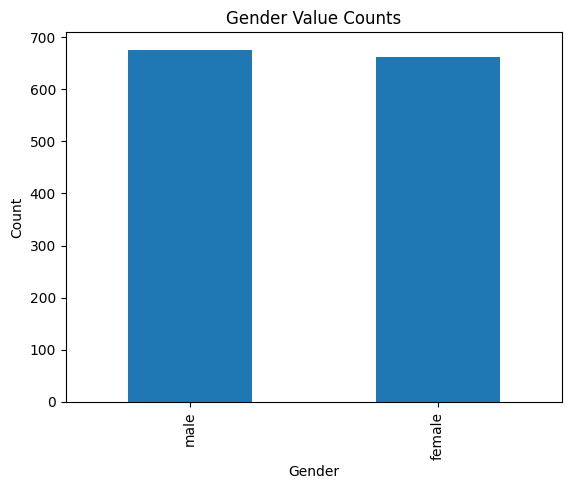

In [10]:
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Value Counts')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [11]:
for col in df.columns:
    if df[col].dtype == 'O':  # if the column is categorical
        print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for gender:
gender
male      676
female    662
Name: count, dtype: int64

Value counts for smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

Value counts for region:
region
southeast    366
northwest    325
northeast    324
southwest    323
Name: count, dtype: int64

Value counts for insuranceclaim:
insuranceclaim
yes    783
no     555
Name: count, dtype: int64



/tmp/ipykernel_1956812/1532162987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp.index,y=temp.values, palette='viridis')
/tmp/ipykernel_1956812/1532162987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp.index,y=temp.values, palette='viridis')
/tmp/ipykernel_1956812/1532162987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp.index,y=temp.values, palette='viridis')
/tmp/ipykernel_1956812/1532162987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

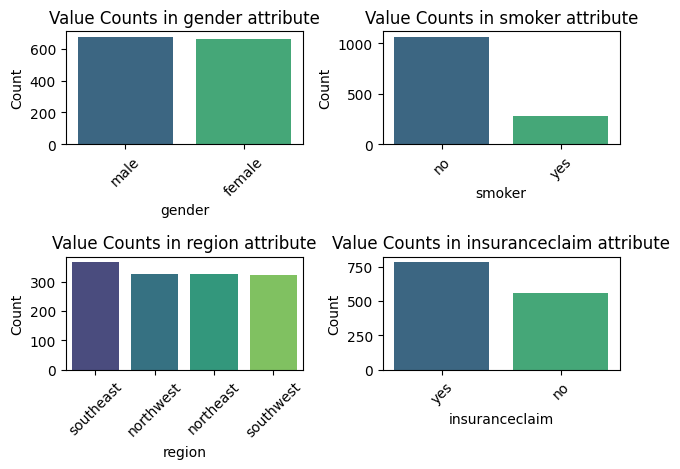

In [12]:
cnt = 1

for col in df.columns:
    if df[col].dtype == 'O': 
        temp = df[col].value_counts()
        plt.subplot(2,2,cnt) # subplot 2x2 and cnt will increment like (2,2,1) , (2,2,2) , (2,2,3) and (2,2,4)
        sns.barplot(x=temp.index,y=temp.values, palette='viridis')
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.subplots_adjust(hspace=1)
        plt.title(f"Value Counts in {col} attribute")
        cnt += 1 


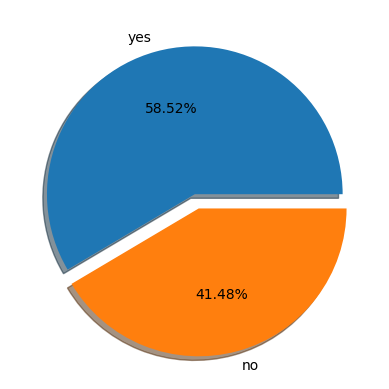

In [13]:
myexplode = [0,0.1] 

plot_data = df['insuranceclaim'].value_counts()

plt.pie(x=plot_data.values,
        labels=plot_data.index,
        autopct=f'%2.2f%%',
        shadow=True,
        explode=myexplode);

/home/omjadhav/miniconda3/envs/gpu_env/lib/python3.9/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


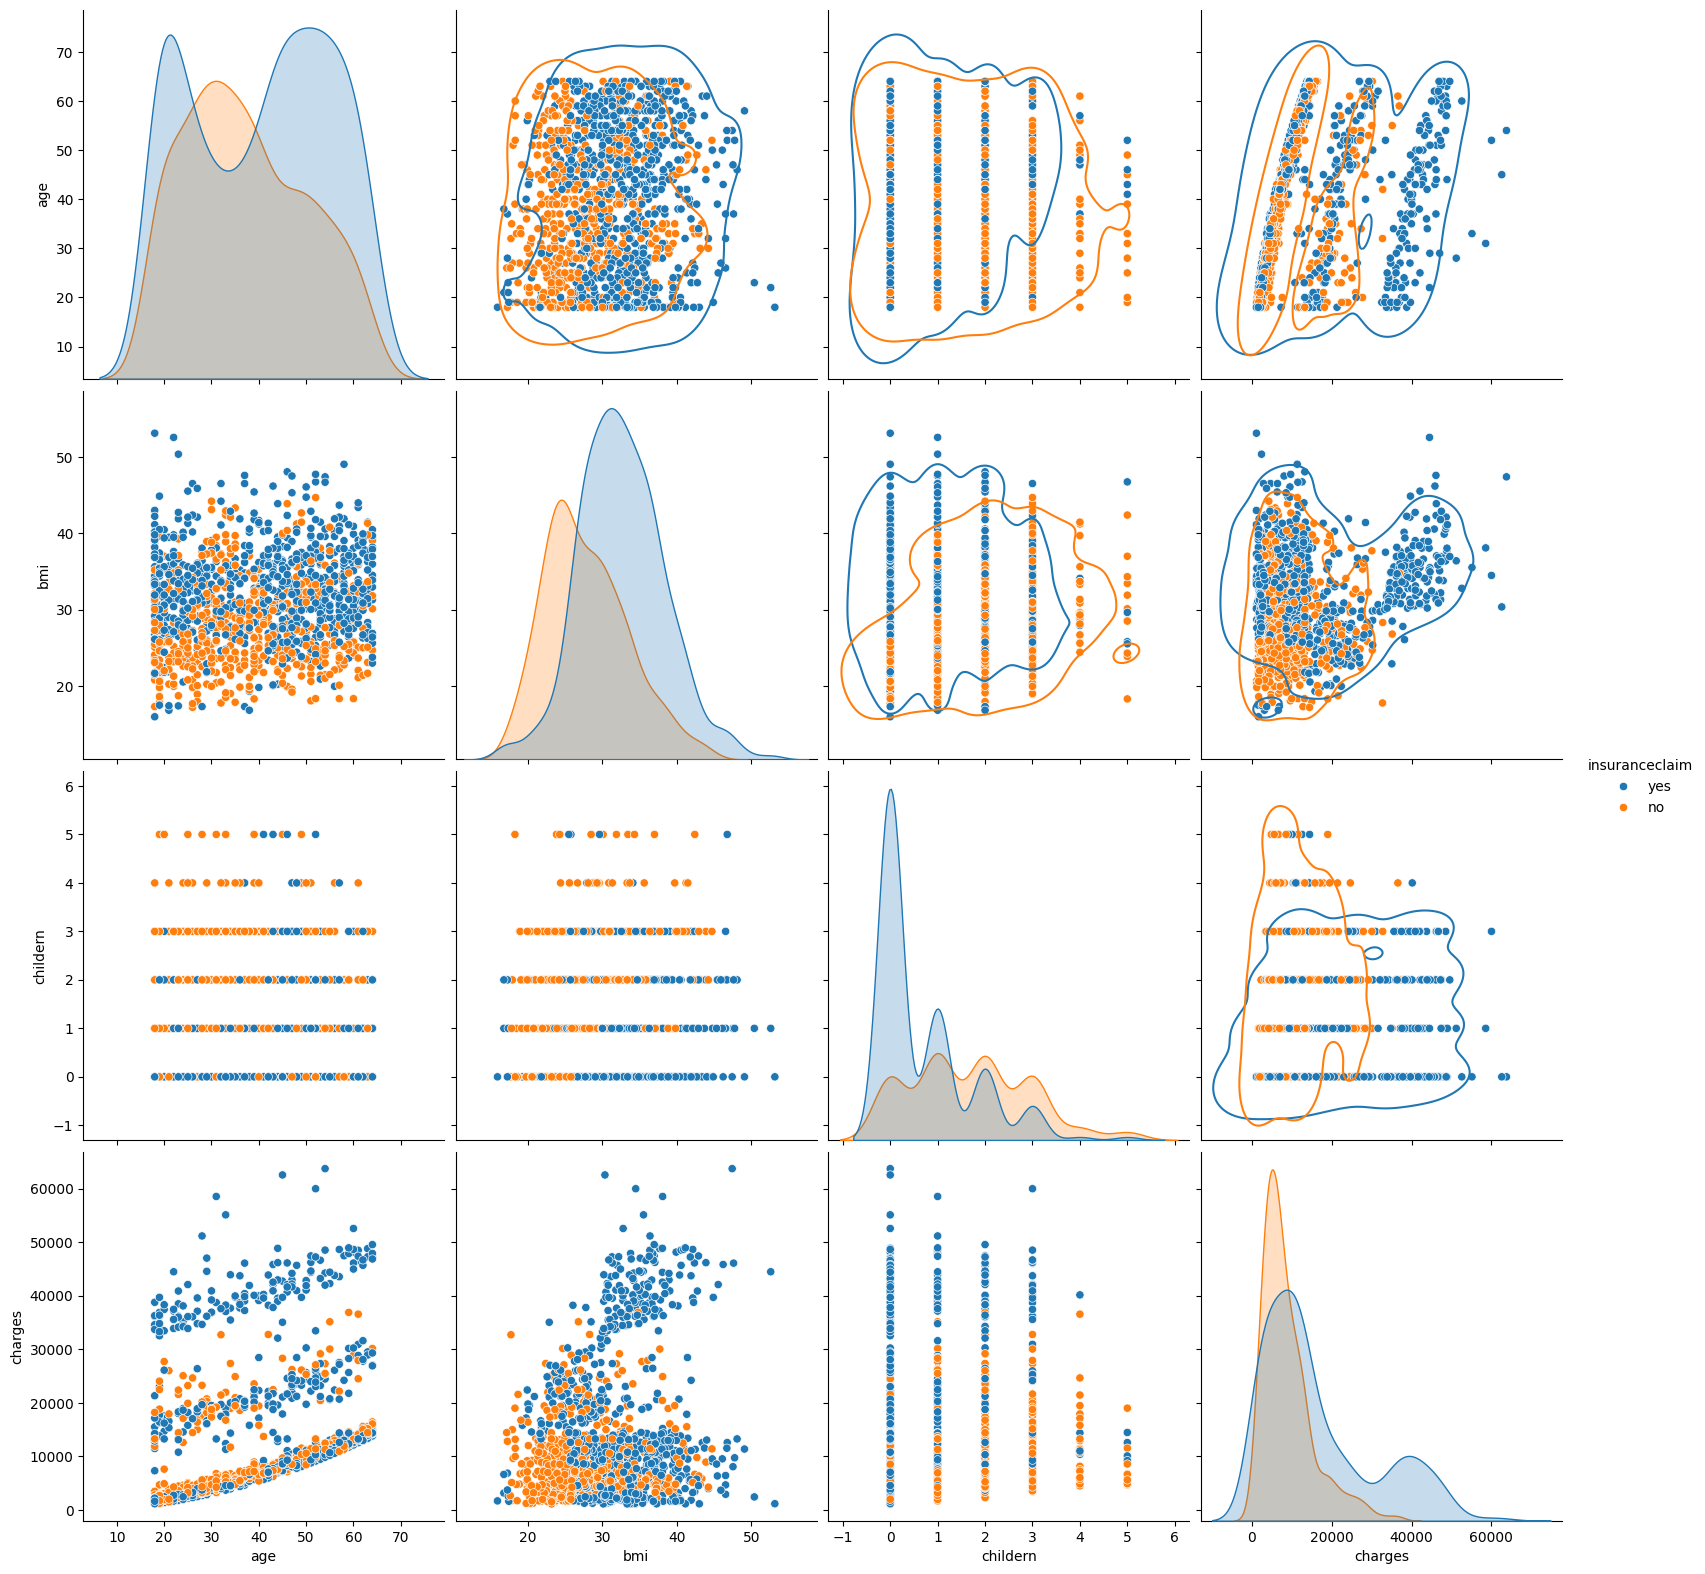

In [14]:
# Understanding the relationship between all the features
# in below plot diagonal columns will show distribution of data while remain will show relationship with each other 

g=sns.pairplot(df, hue='insuranceclaim', size=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

- most of values seems to overlap target values no proper seperation from numeric column

In [15]:
#Lets convert the categorical variables into numerical variables
df['gender'] = df['gender'].astype('category').cat.codes
df['smoker'] = df['smoker'].astype('category').cat.codes
df = pd.get_dummies(df, columns=['region'], drop_first=True,dtype=np.int16) # one hot encoding for region
df['insuranceclaim'] = df['insuranceclaim'].astype('category').cat.codes

In [16]:
df.head()

,age,gender,bmi,childern,smoker,charges,insuranceclaim,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0,1,16884.92400,1,0,0,1
1,18.0,1,33.770,1,0,1725.55230,1,0,1,0
2,28.0,1,33.000,3,0,4449.46200,0,0,1,0
3,33.0,1,22.705,0,0,21984.47061,0,1,0,0
4,32.0,1,28.880,0,0,3866.85520,1,1,0,0


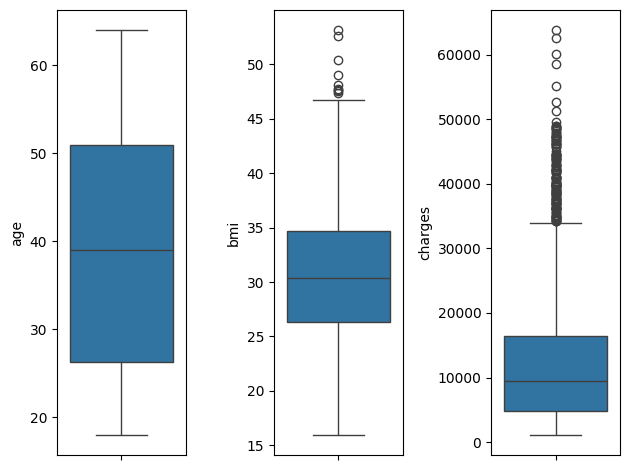

In [17]:
cnt = 1

for col in ['age','bmi','charges']:
    temp = df[col]
    plt.subplot(1,3,cnt) # subplot 2x2 and cnt will increment like (2,2,1) , (2,2,2) , (2,2,3) and (2,2,4)
    sns.boxplot(df[col])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.subplots_adjust(hspace=1)
    cnt += 1 

In [18]:
df.corr()

,age,gender,bmi,childern,smoker,charges,insuranceclaim,region_northwest,region_southeast,region_southwest
age,1.000000,-0.019859,0.107373,0.044627,-0.027272,0.289620,0.112539,0.001005,-0.014535,0.011617
gender,-0.019859,1.000000,0.046247,0.017163,0.076185,0.058566,0.031565,-0.011156,0.017053,-0.004156
bmi,0.107373,0.046247,1.000000,0.012813,0.005265,0.199510,0.383641,-0.135808,0.271786,-0.007643
childern,0.044627,0.017163,0.012813,1.000000,0.007673,0.070414,-0.409526,0.024806,-0.023290,0.022235
smoker,-0.027272,0.076185,0.005265,0.007673,1.000000,0.784571,0.333261,-0.036945,0.066680,-0.035251
charges,0.289620,0.058566,0.199510,0.070414,0.784571,1.000000,0.307187,-0.042439,0.073934,-0.043260
insuranceclaim,0.112539,0.031565,0.383641,-0.409526,0.333261,0.307187,1.000000,-0.096184,0.108269,-0.024885
region_northwest,0.001005,-0.011156,-0.135808,0.024806,-0.036945,-0.042439,-0.096184,1.000000,-0.347572,-0.319525
region_southeast,-0.014535,0.017053,0.271786,-0.023290,0.066680,0.073934,0.108269,-0.347572,1.000000,-0.346159
region_southwest,0.011617,-0.004156,-0.007643,0.022235,-0.035251,-0.043260,-0.024885,-0.319525,-0.346159,1.000000


In [30]:
#Removal of outlier:

# following loop implements the mathematical function for removing outliers using 'Quartiles'
for i in ['age','bmi','charges']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[i] <= (Q3+(1.5*IQR))]
    df = df[df[i] >= (Q1-(1.5*IQR))]
        
df = df.reset_index(drop=True)
display(df.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df.shape[0]))

,age,gender,bmi,childern,smoker,charges,insuranceclaim,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0,1,16884.92400,1,0,0,1
1,18.0,1,33.770,1,0,1725.55230,1,0,1,0
2,28.0,1,33.000,3,0,4449.46200,0,0,1,0
3,33.0,1,22.705,0,0,21984.47061,0,1,0,0
4,32.0,1,28.880,0,0,3866.85520,1,1,0,0



Inference: Before removal of outliers, The dataset had 1107 samples.
Inference: After removal of outliers, The dataset now has 1107 samples.


In [20]:
# re run outlier removal code to see the effect (I ran it 6 times)

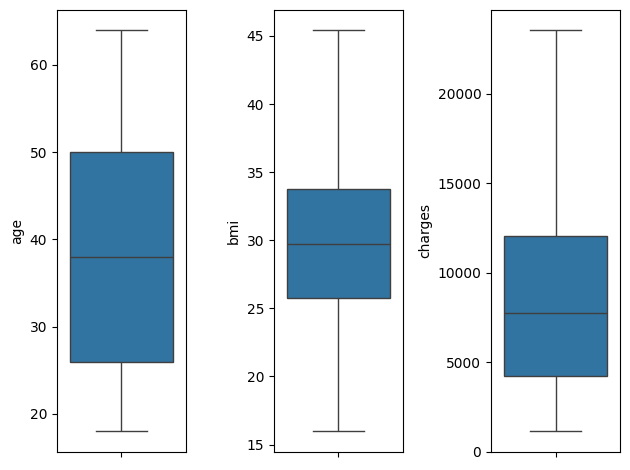

In [31]:
cnt = 1

for col in ['age','bmi','charges']:
    temp = df[col]
    plt.subplot(1,3,cnt) # subplot 2x2 and cnt will increment like (2,2,1) , (2,2,2) , (2,2,3) and (2,2,4)
    sns.boxplot(df[col])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.subplots_adjust(hspace=1)
    cnt += 1 

In [32]:
df.corr()

,age,gender,bmi,childern,smoker,charges,insuranceclaim,region_northwest,region_southeast,region_southwest
age,1.000000,-0.015051,0.150085,0.031906,-0.124560,0.513764,0.109184,-0.011768,-0.020719,0.031631
gender,-0.015051,1.000000,0.011659,0.009521,0.016599,-0.019044,-0.010797,0.002619,0.006869,-0.005725
bmi,0.150085,0.011659,1.000000,-0.010605,-0.257502,-0.054286,0.351409,-0.110698,0.236257,0.007987
childern,0.031906,0.009521,-0.010605,1.000000,-0.002072,0.115926,-0.480213,0.014151,-0.015281,0.029623
smoker,-0.124560,0.016599,-0.257502,-0.002072,1.000000,0.562648,0.145154,-0.013190,0.000423,-0.028082
charges,0.513764,-0.019044,-0.054286,0.115926,0.562648,1.000000,0.126392,-0.017121,-0.028165,-0.037046
insuranceclaim,0.109184,-0.010797,0.351409,-0.480213,0.145154,0.126392,1.000000,-0.089260,0.081537,-0.014112
region_northwest,-0.011768,0.002619,-0.110698,0.014151,-0.013190,-0.017121,-0.089260,1.000000,-0.335342,-0.333735
region_southeast,-0.020719,0.006869,0.236257,-0.015281,0.000423,-0.028165,0.081537,-0.335342,1.000000,-0.335342
region_southwest,0.031631,-0.005725,0.007987,0.029623,-0.028082,-0.037046,-0.014112,-0.333735,-0.335342,1.000000


| Dataset               | age      | gender   | bmi      | childern | smoker   | charges  | insuranceclaim | region_nw | region_se | region_sw |
|:---------------------|:---------|:----------|:----------|:----------|:----------|:----------|:----------------|:-------------------|:-------------------|:-------------------|
| **Original**          | 0.112539 | 0.031565 | 0.383641 | -0.409526 | 0.333261 | 0.307187 | 1.000000        | -0.096184          | 0.108269            | -0.024885          |
| **Outlier Removed 1** | 0.123294 | -0.003274| 0.336833 | -0.451234 | 0.196966 | 0.148533 | 1.000000        | -0.078364          | 0.082652            | -0.022263          |
| **Outlier Removed 2** | 0.121222 | -0.008390| 0.337352 | -0.463158 | 0.173946 | 0.139371 | 1.000000        | -0.079130          | 0.075883            | -0.011528          |
| **Outlier Removed 3** | 0.115256 | -0.010523| 0.346466 | -0.475052 | 0.157039 | 0.136436 | 1.000000        | -0.085525          | 0.081983            | -0.016970          |
| **Outlier Removed 4** | 0.111204 | -0.009849| 0.348374 | -0.478095 | 0.151256 | 0.132078 | 1.000000        | -0.084330          | 0.079898            | -0.015582          |
| **Outlier Removed 5** | 0.109766 | -0.009904| 0.350572 | -0.479225 | 0.147210 | 0.128296 | 1.000000        | -0.087608          | 0.080989            | -0.014604          |
| **Outlier Removed 6** | 0.109184 | -0.010797| 0.351409 | -0.480213 | 0.145154 | 0.126392 | 1.000000        | -0.089260          | 0.081537            | -0.014112          |



Notice how as we remove outliers, the correlation with our target reduces. This tells us outliers can artificially boost relationships between features and targets. While the initial model might seem stronger, it risks overfitting or making poor predictions on new, unseen data. A good ML workflow balances between capturing meaningful relationships and ensuring the model generalizes well — even if it means weaker, but more reliable, correlations.

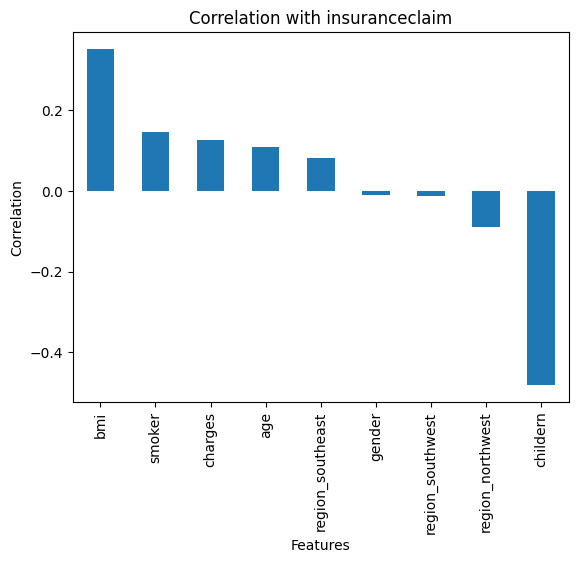

In [33]:
df.corr()['insuranceclaim'].sort_values(ascending=False).drop('insuranceclaim').plot(kind='bar')
plt.title('Correlation with insuranceclaim')
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()

In [34]:
training_data = df.drop(['gender','region_southwest'],axis=1)

In [35]:
x = training_data.drop('insuranceclaim',axis=1)
y = training_data['insuranceclaim']

In [36]:
# Make Imports At Top
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((885, 7), (885,), (222, 7), (222,))

In [39]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
y_pred = logmodel.predict(x_test)

In [41]:
accuracy_score(y_test, y_pred)

0.918918918918919

In [42]:
confusion_matrix(y_test, y_pred)

array([[ 96,  10],
       [  8, 108]])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       106
           1       0.92      0.93      0.92       116

    accuracy                           0.92       222
   macro avg       0.92      0.92      0.92       222
weighted avg       0.92      0.92      0.92       222

